In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# 3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()

In [5]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp,columns=['Date', 'Temp'])
june_temp_df.head()

,Date,Temp
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [6]:
# Set 'date' column as datetime dtype.
import datetime as dt 
june_temp_df['Date'] = pd.to_datetime(june_temp_df['Date'])
june_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1700 non-null   datetime64[ns]
 1   Temp    1700 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.7 KB


In [7]:
# Check date range is correct
# Check min date
june_temp_df['Date'].min()

Timestamp('2010-06-01 00:00:00')

In [8]:
# Check date range is correct
# Check max date
june_temp_df['Date'].max()

Timestamp('2017-06-30 00:00:00')

In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 7. Convert the December temperatures to a list.
december_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp,columns=['Date', 'Temp'])
december_temp_df['Date'] = pd.to_datetime(december_temp_df['Date'])
# Check the dataframe
december_temp_df.head()

,Date,Temp
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [12]:
# Check min date in range correct
december_temp_df['Date'].min()

Timestamp('2010-12-01 00:00:00')

In [13]:
# Check max date in range correct
december_temp_df['Date'].max()

Timestamp('2016-12-31 00:00:00')

In [14]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
december_temp_df.describe()

,Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional Queries

In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

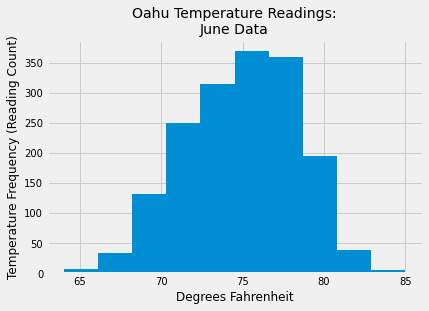

In [16]:
# Plot histogram of June Temperature readings
june_adjusted_df = june_temp_df.drop(columns='Date')
june_adjusted_df.hist()
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("Oahu Temperature Readings:\nJune Data",fontsize=14)
plt.xlabel("Degrees Fahrenheit", fontsize=12)
plt.ylabel("Temperature Frequency (Reading Count)",fontsize=12)
plt.savefig('Charts/June_Temp_Readings.jpg', dpi = 600,bbox_inches='tight')
plt.savefig('Charts/June_Temp_Readings.png', dpi = 600,bbox_inches='tight')

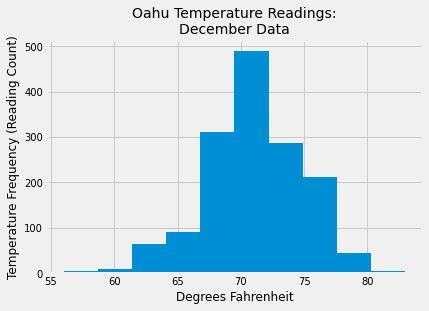

In [17]:
# Plot histogram of December Temperature readings
december_adjusted_df = december_temp_df.drop(columns='Date')
december_adjusted_df.hist()
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title("Oahu Temperature Readings:\nDecember Data",fontsize=14)
plt.xlabel("Degrees Fahrenheit", fontsize=12)
plt.ylabel("Temperature Frequency (Reading Count)",fontsize=12)
plt.savefig('Charts/December_Temp_Readings.jpg', dpi = 600,bbox_inches='tight')
plt.savefig('Charts/December_Temp_Readings.png', dpi = 600,bbox_inches='tight')

In [18]:
# Get June Precipitation
june_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==6).all()

In [19]:
# Create a DataFrame from the precipitation measurements for the month of June.
june_precip_df = pd.DataFrame(june_precip,columns=['Date', 'Precipitation'])
june_precip_df['Date'] = pd.to_datetime(june_precip_df['Date'])
june_precip_df.head()

,Date,Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00


In [20]:
june_precip_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [21]:
# Get December Precipitation
december_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(extract('month', Measurement.date)==12).all()

In [22]:
december_precip_df = pd.DataFrame(december_precip,columns=['Date', 'Precipitation'])
december_precip_df['Date'] = pd.to_datetime(december_precip_df['Date'])
december_precip_df.head()

,Date,Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00


In [23]:
december_precip_df.describe()

,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
